In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# تابع تولید ماسک با استفاده از الگوریتم رشد ناحیه
def mask_generator(image, seed_point, threshold=50):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # تبدیل تصویر به خاکستری
    h, w = gray.shape
    seed_value = gray[seed_point[1], seed_point[0]]  # مقدار پیکسل اولیه

    mask = np.zeros_like(gray, dtype=np.uint8)  # ایجاد ماسک اولیه
    stack = [seed_point]  # پشته برای الگوریتم رشد ناحیه

    # الگوریتم رشد ناحیه
    while stack:
        x, y = stack.pop()  # گرفتن پیکسل از پشته

        if x < 0 or y < 0 or x >= w or y >= h or mask[y, x] == 255:  # اگر پیکسل خارج از تصویر یا قبلاً پردازش شده باشد
            continue

        # بررسی تشابه پیکسل
        if abs(int(gray[y, x]) - int(seed_value)) < threshold:
            mask[y, x] = 255  # تنظیم مقدار پیکسل در ماسک

            # اضافه کردن پیکسل‌های همسایه
            stack.extend([(x+1, y), (x-1, y), (x, y+1), (x, y-1)])
    return mask


In [8]:

# پیدا کردن مرز ناحیه با استفاده از Canny
def canny_edge(mask):
    mask_blured = cv.GaussianBlur(mask, (19, 19), 0)  # Blur کردن ماسک
    edges = cv.Canny(mask_blured, threshold1=100, threshold2=200)  # استفاده از روش Canny برای پیدا کردن لبه‌ها
    return edges


In [9]:
# بارگیری تصاویر و تقسیم آن‌ها به پچ‌ها
image = cv.imread('images/10000.jpg')  # خواندن تصویر اول
H, W = image.shape[:2]
h = H // 4
w = W // 2


In [10]:
patches = [
    image[:h, :w],  # 1st patch
    image[:h, w:],  # 2nd patch
    image[h:2*h, :w],  # 3rd patch
    image[h:2*h, w:],  # 4th patch
    image[2*h:3*h, :w],  # 5th patch
    image[2*h:3*h, w:],  # 6th patch
    image[3*h:, :w],  # 7th patch
    image[3*h:, w:],  # 8th patch
    cv.imread('skin.jpg')  # 9th patch
]


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


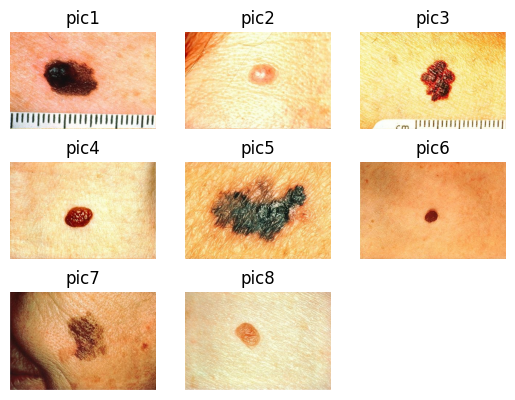

In [11]:

# تبدیل تصاویر به فضای رنگی RGB و نمایش آن‌ها
for i in range(9):
    patches[i] = cv.cvtColor(patches[i], cv.COLOR_BGR2RGB)
    plt.subplot(3, 3, i + 1)
    plt.title(f'pic{i+1}')
    plt.imshow(patches[i])
    plt.axis('off')
plt.tight_layout()


In [ ]:
# تنظیم نقطه‌های شروع ماسک (seed points)
seeds = [(130, 120), (210, 100), (220, 135),
         (190, 150), (200, 135), (190, 140),
         (200, 135), (160, 120), (150, 95)]



In [ ]:
masks = []
outputs1 = []

# ایجاد ماسک و پیدا کردن مرز برای هر پچ
for i in range(9):
    mask = mask_generator(patches[i], seeds[i])
    out1 = canny_edge(mask)
    masks.append(mask)
    outputs1.append(out1)


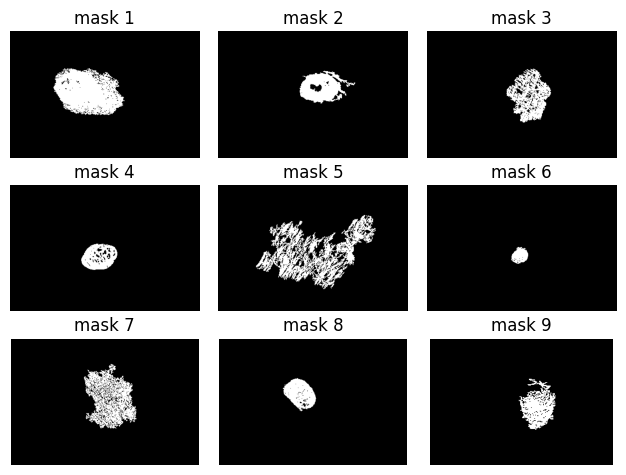

In [ ]:

# نمایش ماسک‌ها
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(f'mask {i+1}')
    plt.imshow(masks[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()


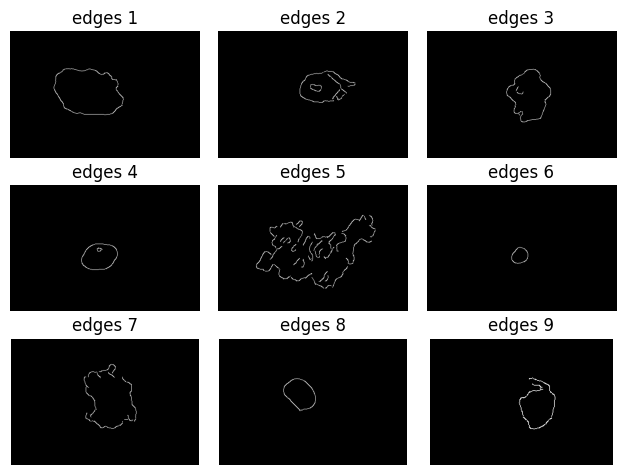

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title(f'edges {i+1}')
    plt.imshow(outputs1[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
